In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

In [9]:
df=pd.read_csv('/content/heart.csv')

In [10]:
df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [12]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [13]:
df.isnull().sum()

,0
Age,0
Sex,0
ChestPainType,0
RestingBP,0
Cholesterol,0
FastingBS,0
RestingECG,0
MaxHR,0
ExerciseAngina,0
Oldpeak,0


In [14]:
df.nunique()

,0
Age,50
Sex,2
ChestPainType,4
RestingBP,67
Cholesterol,222
FastingBS,2
RestingECG,3
MaxHR,119
ExerciseAngina,2
Oldpeak,53


In [15]:
df['Age'].value_counts()

,count
Age,
54,51
58,42
55,41
56,38
57,38
52,36
62,35
59,35
51,35


In [16]:
# prompt: convert to age group 0-20,21-40,41-60,61+

def age_group(age):
    if 0 <= age <= 20:
        return '0-20'
    elif 21 <= age <= 40:
        return '21-40'
    elif 41 <= age <= 60:
        return '41-60'
    elif age >= 61:
        return '61+'
    else:
        return 'Unknown'  # Handle cases outside the defined ranges

df['age_group'] = df['Age'].apply(age_group)


In [17]:
df.age_group.value_counts()

,count
age_group,
41-60,604
61+,221
21-40,93


In [18]:
df.groupby('age_group')['HeartDisease'].value_counts()

age_group  HeartDisease
21-40      0                61
           1                32
41-60      1               315
           0               289
61+        1               161
           0                60
Name: count, dtype: int64

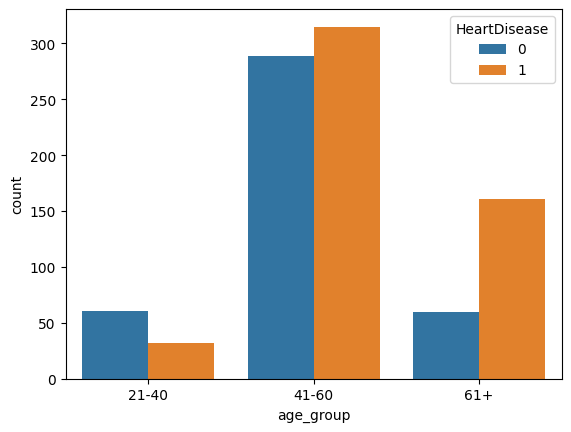

In [19]:
plot=sns.countplot(x='age_group',hue='HeartDisease',data=df)

In [20]:
df.Sex.value_counts()

,count
Sex,
M,725
F,193


In [21]:
df.groupby('Sex')['HeartDisease'].value_counts()

Sex  HeartDisease
F    0               143
     1                50
M    1               458
     0               267
Name: count, dtype: int64

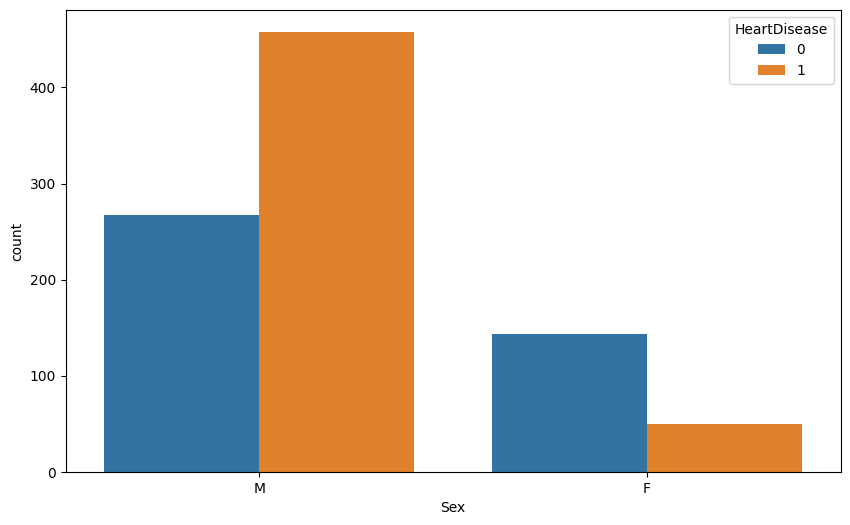

In [22]:
plt.figure(figsize=(10,6))
plot=sns.countplot(x='Sex',hue='HeartDisease',data=df)

In [23]:
df.ChestPainType.value_counts()

,count
ChestPainType,
ASY,496
NAP,203
ATA,173
TA,46


In [24]:
df.groupby('ChestPainType')['age_group'].value_counts()

ChestPainType  age_group
ASY            41-60        322
               61+          141
               21-40         33
ATA            41-60        128
               21-40         29
               61+           16
NAP            41-60        134
               61+           45
               21-40         24
TA             41-60         20
               61+           19
               21-40          7
Name: count, dtype: int64

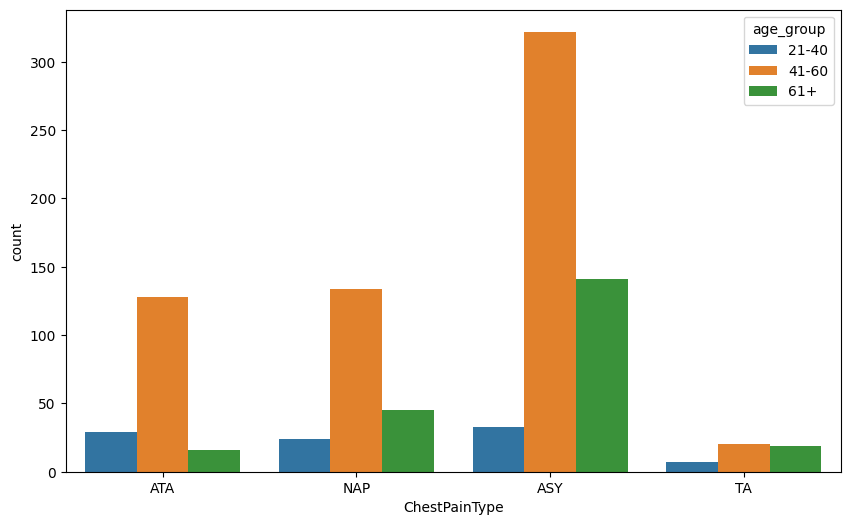

In [25]:
plt.figure(figsize=(10,6))
plot=sns.countplot(x='ChestPainType',hue='age_group',data=df)

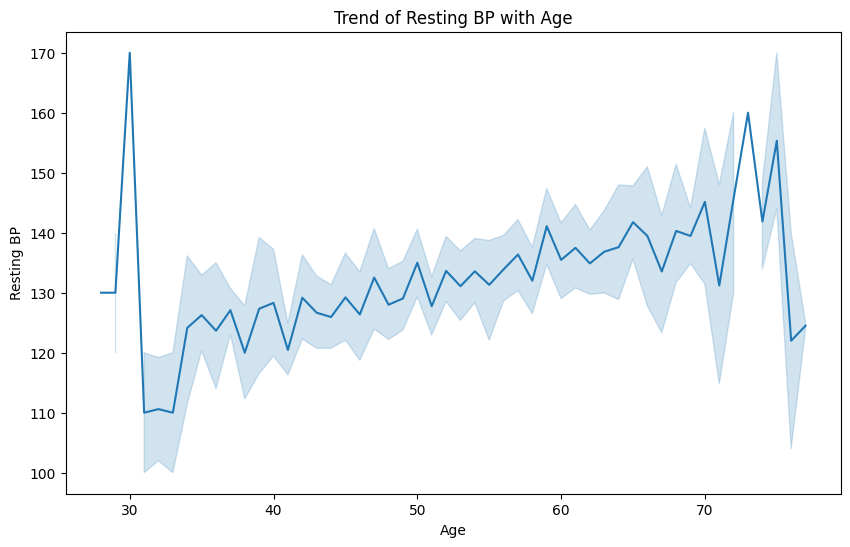

In [26]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='RestingBP', data=df)
plt.title('Trend of Resting BP with Age')
plt.xlabel('Age')
plt.ylabel('Resting BP')
plt.show()


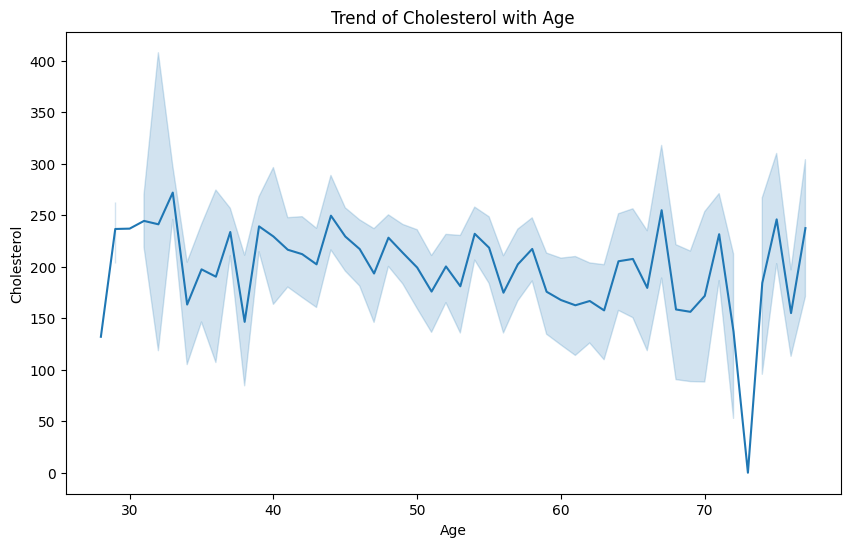

In [27]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Age', y='Cholesterol', data=df)
plt.title('Trend of Cholesterol with Age')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.show()


In [28]:
mean_values = df.groupby(['age_group', 'Sex'])[['Cholesterol', 'RestingBP']].mean()
mean_values


Cholesterol   RestingBP
age_group Sex                         
21-40     F     195.400000  122.400000
          M     210.301370  125.082192
41-60     F     251.164062  131.070312
          M     191.420168  131.707983
61+       F     233.200000  139.822222
          M     167.494318  137.494318

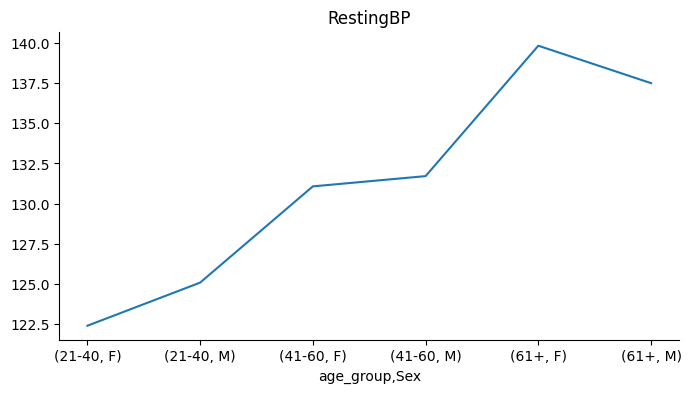

In [29]:
mean_values['RestingBP'].plot(kind='line', figsize=(8, 4), title='RestingBP')
plt.gca().spines[['top', 'right']].set_visible(False)

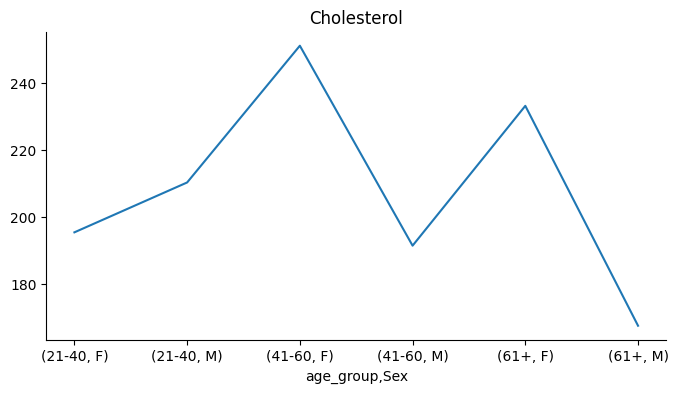

In [30]:
mean_values['Cholesterol'].plot(kind='line', figsize=(8, 4), title='Cholesterol')
plt.gca().spines[['top', 'right']].set_visible(False)

In [31]:
df.FastingBS.value_counts()

,count
FastingBS,
0,704
1,214


In [32]:
df.groupby('FastingBS')['age_group'].value_counts()

FastingBS  age_group
0          41-60        474
           61+          148
           21-40         82
1          41-60        130
           61+           73
           21-40         11
Name: count, dtype: int64

In [33]:
df.groupby('FastingBS')['HeartDisease'].value_counts()

FastingBS  HeartDisease
0          0               366
           1               338
1          1               170
           0                44
Name: count, dtype: int64

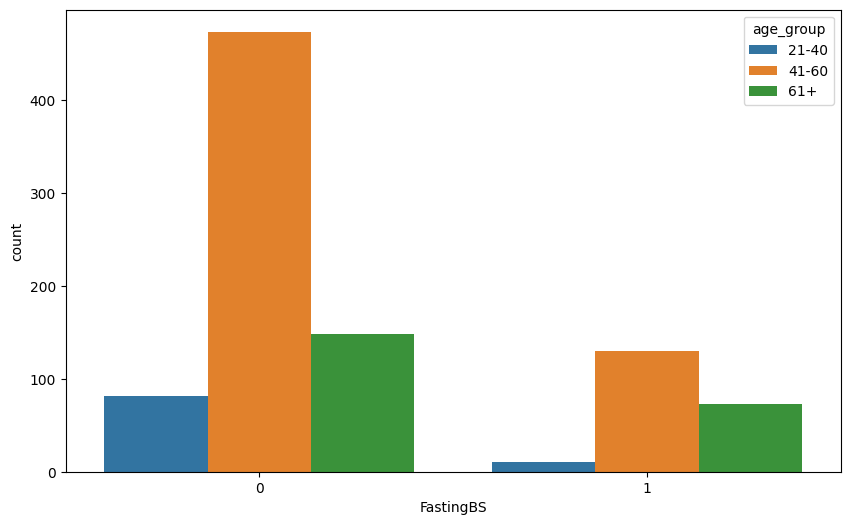

In [34]:
plt.figure(figsize=(10,6))
plot=sns.countplot(x='FastingBS',hue='age_group',data=df)

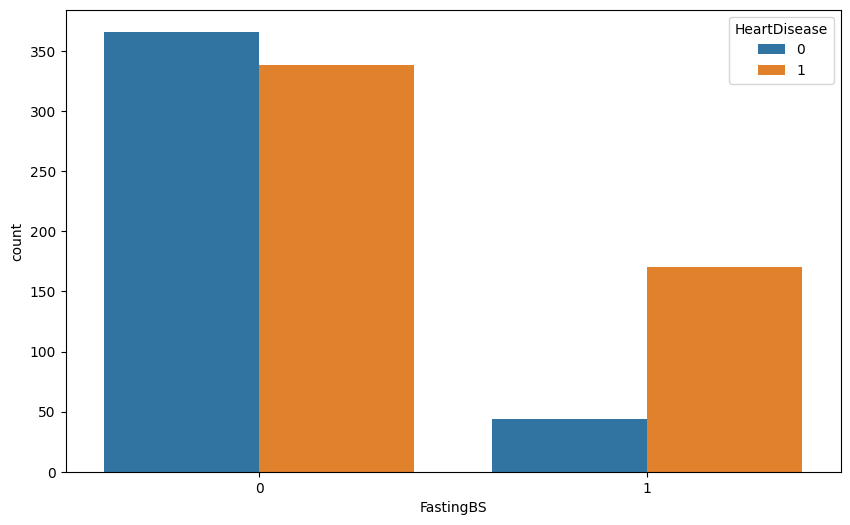

In [35]:
plt.figure(figsize=(10,6))
plot=sns.countplot(x='FastingBS',hue='HeartDisease',data=df)

In [36]:
df.RestingECG.value_counts()

,count
RestingECG,
Normal,552
LVH,188
ST,178


In [37]:
df.groupby('RestingECG')['age_group'].value_counts()

RestingECG  age_group
LVH         41-60        121
            61+           59
            21-40          8
Normal      41-60        374
            61+          103
            21-40         75
ST          41-60        109
            61+           59
            21-40         10
Name: count, dtype: int64

In [38]:
df.groupby('RestingECG')['HeartDisease'].value_counts()

RestingECG  HeartDisease
LVH         1               106
            0                82
Normal      1               285
            0               267
ST          1               117
            0                61
Name: count, dtype: int64

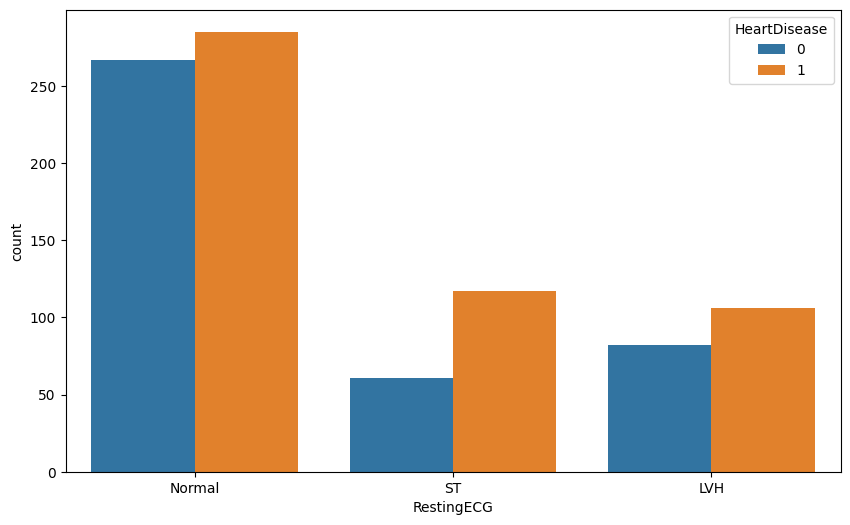

In [39]:
plt.figure(figsize=(10,6))
plot=sns.countplot(x='RestingECG',hue='HeartDisease',data=df)

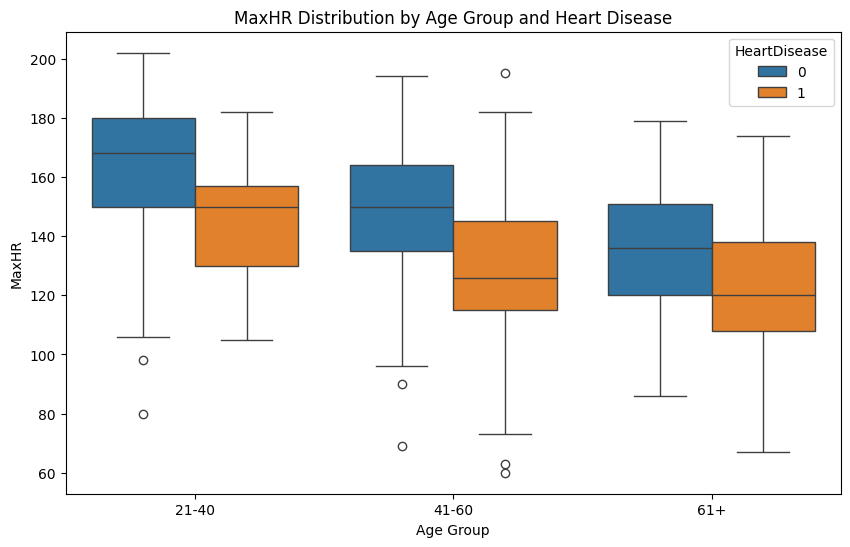

In [40]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='age_group', y='MaxHR', hue='HeartDisease', data=df)
plt.title('MaxHR Distribution by Age Group and Heart Disease')
plt.xlabel('Age Group')
plt.ylabel('MaxHR')
plt.show()


In [41]:
df.columns


Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease', 'age_group'],
      dtype='object')

In [42]:
df.ExerciseAngina.value_counts()

,count
ExerciseAngina,
N,547
Y,371


In [43]:
df.groupby('ExerciseAngina')['age_group'].value_counts()

ExerciseAngina  age_group
N               41-60        366
                61+          106
                21-40         75
Y               41-60        238
                61+          115
                21-40         18
Name: count, dtype: int64

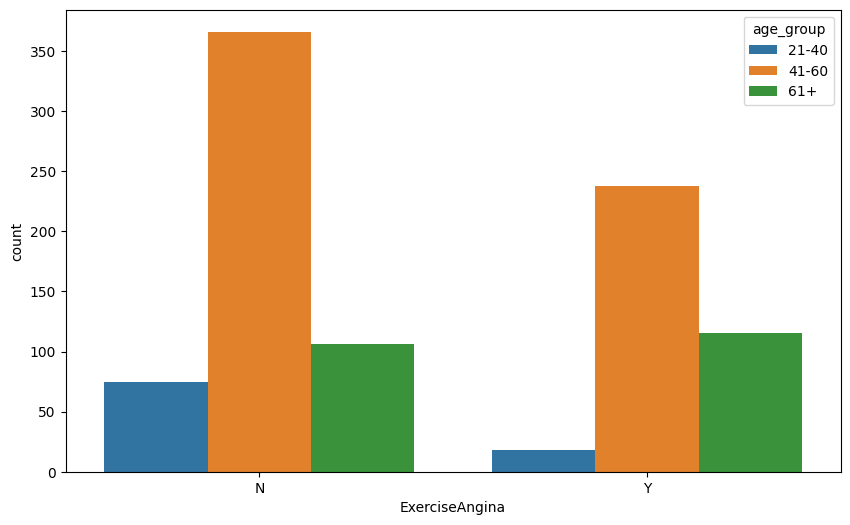

In [44]:
plt.figure(figsize=(10,6))
plot=sns.countplot(x='ExerciseAngina',hue='age_group',data=df)

In [45]:
df.ST_Slope.value_counts()

,count
ST_Slope,
Flat,460
Up,395
Down,63


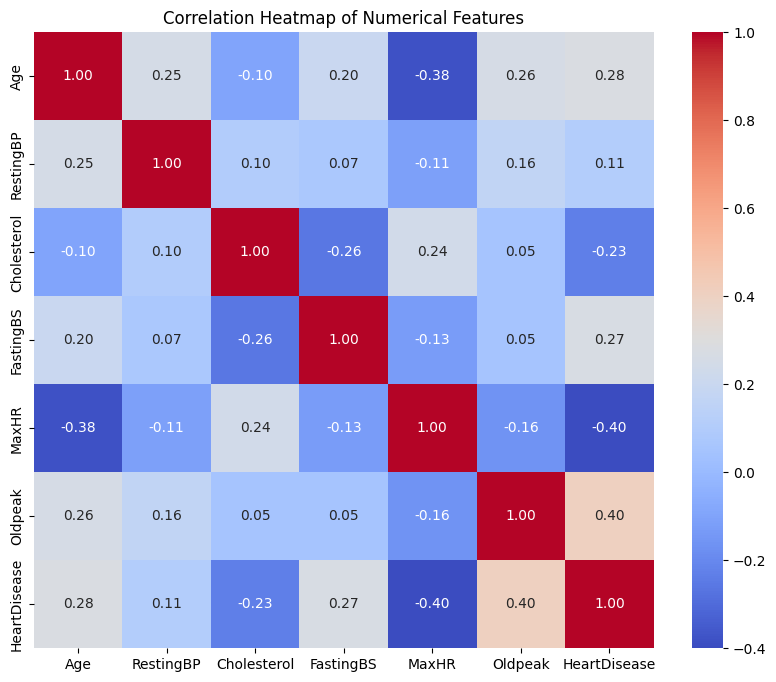

HeartDisease    1.000000
Oldpeak         0.403951
Age             0.282039
FastingBS       0.267291
RestingBP       0.107589
Cholesterol    -0.232741
MaxHR          -0.400421
Name: HeartDisease, dtype: float64


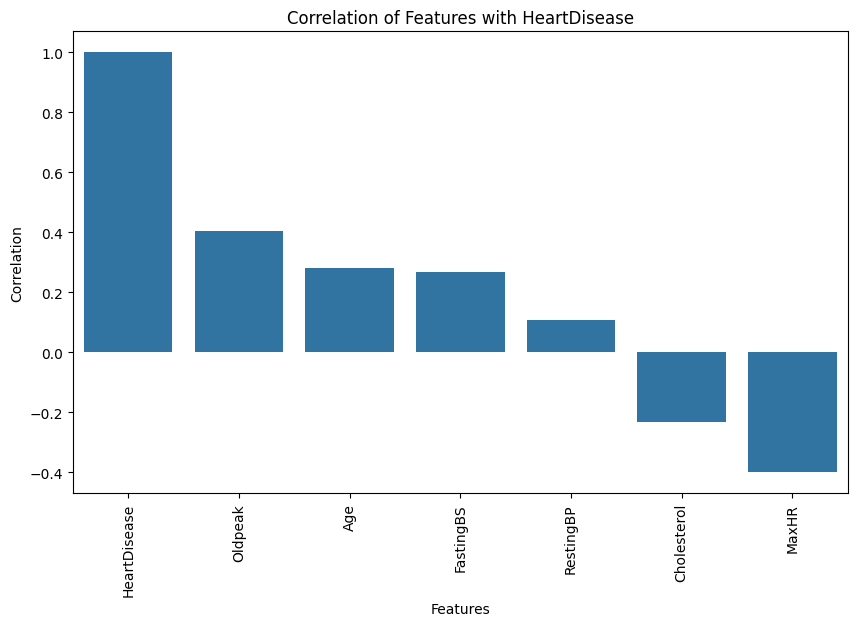

In [50]:
numerical_df = df.select_dtypes(include=['number'])

plt.figure(figsize=(10, 8))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Numerical Features')
plt.show()

# Calculate correlation with 'HeartDisease'
correlation_with_heartdisease = numerical_df.corr()['HeartDisease'].sort_values(ascending=False)

print(correlation_with_heartdisease)

# Plotting the correlation with HeartDisease
plt.figure(figsize=(10, 6))
sns.barplot(x=correlation_with_heartdisease.index, y=correlation_with_heartdisease.values)
plt.xticks(rotation=90)
plt.title('Correlation of Features with HeartDisease')
plt.xlabel('Features')
plt.ylabel('Correlation')
plt.show()

In [60]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score
from sklearn.metrics import f1_score, roc_auc_score
from sklearn.ensemble import GradientBoostingClassifier


# Select features and target variable
X = df.drop('HeartDisease', axis=1)
y = df['HeartDisease']

# Convert categorical features to numerical using Label Encoding
categorical_cols = X.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for col in categorical_cols:
    X[col] = label_encoder.fit_transform(X[col])

# 2. Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 3. Feature Scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


# 4. Model Training and Evaluation (using multiple models)
models = {
    'Logistic Regression': LogisticRegression(),
    'Random Forest': RandomForestClassifier(),
    'SVM': SVC(),
    'Gradient Boosting': GradientBoostingClassifier(),
    'Decision Tree': DecisionTreeClassifier(),
    'Gradient Boosting': GradientBoostingClassifier()
}

results = {}
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    try:
      roc_auc = roc_auc_score(y_test, y_pred)
    except ValueError:
      roc_auc = 0

    results[name] = {
        'accuracy': accuracy,
        'precision': precision,
        'recall': recall,
        'f1_score': f1,
        'roc_auc': roc_auc,
        'classification_report': classification_report(y_test, y_pred)
    }
    print(f'{name}:')
    print(f'Accuracy: {accuracy}')
    print(f'Precision: {precision}')
    print(f'Recall: {recall}')
    print(f'F1 Score: {f1}')
    print(f'ROC AUC: {roc_auc}')
    print(classification_report(y_test, y_pred))
    print('-' * 20)




Logistic Regression:
Accuracy: 0.842391304347826
Precision: 0.90625
Recall: 0.8130841121495327
F1 Score: 0.8571428571428571
ROC AUC: 0.8481004976332078
              precision    recall  f1-score   support

           0       0.77      0.88      0.82        77
           1       0.91      0.81      0.86       107

    accuracy                           0.84       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.84      0.84       184

--------------------
Random Forest:
Accuracy: 0.8858695652173914
Precision: 0.9134615384615384
Recall: 0.8878504672897196
F1 Score: 0.9004739336492891
ROC AUC: 0.8854836752033014
              precision    recall  f1-score   support

           0       0.85      0.88      0.87        77
           1       0.91      0.89      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184

---------------

In [65]:
results_df = pd.DataFrame(results).T ##TRANSPOSE TO MAKE MODEL THE INDEX
results_df = results_df[['accuracy', 'precision', 'recall', 'f1_score', 'roc_auc']]
results_df
best_accuracy_model = results_df['accuracy'].idxmax()
print(f"The model with the highest accuracy is: {best_accuracy_model}")
best_f1_model = results_df['f1_score'].idxmax()
print(f"The model with the highest F1-score is: {best_f1_model}")


The model with the highest accuracy is: Random Forest
The model with the highest F1-score is: Random Forest
